In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

****
Função Objetivo I:
$f(x) = 1 - \cos(2π \sqrt\sum_{i=0}^{d} x²_i) + 0.1 * \sqrt\sum_{i=0}^{d} x²_i $
***



In [ ]:
# Funções Objetivo
def f1(solucao):
    soma_quadrados = sum(xi**2 for xi in solucao)
    raiz = math.sqrt(soma_quadrados)
    return 1 - math.cos(2 * math.pi * raiz) + (raiz / 10)


***
a) $ Intervalo: -100 \leq x_1, x_2 \leq 100$

Note que: Como a função os valores negativos são potencializados a segunda, é importante notar que a relevância deste sinal pouco importa. Portanto podemos simplificar o intervalo de 0 a 100, inclusive.

b) $ Intervalo: -20 \leq x_1, x_2 \leq 20$
O mesmo dito em 'a' serve, porém desta vez no intervalo menor.
***

***
Função Objetivo II: $f(x) = 100 (x²_1 - x_2)² + (x_1 - 1)² + (x_3 - 1)² + 90(x²_3 - x_4)² + 10.1((x_2 - 1)² - (x_4 - 1)²) + 19.8(x_2 - 1)(x_4 -1) $

***

In [ ]:
def f2(solucao):
    if len(solucao) != 4:
        raise ValueError("f2 precisa de 4 variáveis")
    x1, x2, x3, x4 = solucao
    return (100*(x1**2 - x2)**2 + (x1-1)**2 + (x3-1)**2 +
            90*(x3**2 - x4)**2 + 10.1*((x2-1)**2 + (x4-1)**2) +
            19.8*(x2-1)*(x4-1))

***
c) $ Intervalo: -10 \leq x_1, x_2, x_3, x_4 \leq 10$

d) $ Intervalo: -2 \leq x_1, x_2, x_3, x_4 \leq 2$
***

### VNS

Função shake
***
Entrada:

current_point: Solução atual;

k: Intensidade da perturbação (controla o tamanho do "salto");

step_size: Tamanho base do passo;

intervalo: Limites das variáveis de decisão.
***
Processo:

Gera uma perturbação aleatória em todas as dimensões, escalonada por k * step_size;

Aplica a perturbação (shake) à solução atual;

Garante que as variáveis permaneçam dentro do intervalo (np.clip).
***
Saída: Nova solução perturbada.
***

In [ ]:
def shake(current_point, k, step_size, intervalo):
    # Gera perturbação para N dimensões
    perturbacao = np.random.uniform(
        low=-k*step_size,
        high=k*step_size,
        size=len(current_point)
    )
    new_point = np.clip(
        current_point + perturbacao,
        intervalo[0],
        intervalo[1]
    )
    return new_point

***
Função local_search (Busca Local)
***
Entrada:

current_point: Ponto inicial;

step_size: Tamanho do passo para geração de candidatos;

intervalo: Limites das variáveis;

func: Função objetivo;

max_tentativas: Número máximo de tentativas de melhoria.
***
Processo:

Gera 10 candidatos perturbando o ponto atual em todas as dimensões;

Avalia cada candidato e mantém o melhor;

Adaptação do passo: Se nenhuma melhoria for encontrada, reduz step_size em 30%.
***
Saída: Melhor solução encontrada na vizinhança.
***

In [ ]:
def local_search(current_point, step_size, intervalo, func, max_tentativas=50):
    # Busca local adaptativa para N dimensões
    melhor_ponto = np.copy(current_point)
    melhor_valor = func(melhor_ponto)

    for _ in range(max_tentativas):
        # Gera candidatos em todas as dimensões
        candidatos = []
        for _ in range(10):
            perturbacao = np.random.uniform(
                -step_size,
                step_size,
                size=len(current_point)
            )
            candidato = np.clip(
                melhor_ponto + perturbacao,
                intervalo[0],
                intervalo[1]
            )
            candidatos.append(candidato)

        # Avalia todos os candidatos
        for candidato in candidatos:
            valor = func(candidato)
            if valor < melhor_valor:
                melhor_valor = valor
                melhor_ponto = candidato

        # Redução adaptativa do passo
        if np.array_equal(melhor_ponto, current_point):
            step_size *= 0.7

    return melhor_ponto, melhor_valor


***
Inicialização:

current_point = np.random.uniform(intervalo[0], intervalo[1], size=dimension)
best_point = current_point.copy()
Gera uma solução inicial aleatória dentro do intervalo.

Loop Principal (max_iter):
Shake (Perturbação):

shaken_point = shake(current_point, k, step_size, intervalo)
Perturba a solução atual usando diferentes intensidades (k de 1 a k_max).
***
Busca Local:

local_point, local_value = local_search(shaken_point, step_size * 0.5, intervalo, func)

Refina a solução perturbada com passo reduzido (step_size * 0.5).
***
Critério de Aceitação:

python
if local_value < current_value:
    current_point = local_point  # Aceita a nova solução
    k = 1  # Reinicia a intensidade da perturbação
else:
    k += 1  # Aumenta a vizinhança
Aceita soluções melhores e reinicia o ciclo.

Rejeita soluções piores e expande a vizinhança.

Atualização da Melhor Solução:

if local_value < best_value:
    best_point = local_point
    best_value = local_value

***
Parâmetros Chave:
Parâmetro	Descrição	Valor Padrão;

k_max	Número máximo de vizinhanças exploradas:	5;

step_size	Tamanho inicial do passo para perturbação:	2.0;

max_iter	Número máximo de iterações globais:	100;

max_tentativas	Tentativas de melhoria na busca local (local_search):	50.

***

In [ ]:
def VNS_continuous(intervalo, func, k_max=5, step_size=2.0, max_iter=100, dimension=2):
    # Inicialização para N dimensões
    current_point = np.random.uniform(
        intervalo[0],
        intervalo[1],
        size=dimension
    )
    current_value = func(current_point)
    best_point = np.copy(current_point)
    best_value = current_value

    for _ in range(max_iter):
        k = 1
        while k <= k_max:
            # Shaking multidimensional
            shaken_point = shake(current_point, k, step_size, intervalo)

            # Busca local com dimensão correta
            local_point, local_value = local_search(
                shaken_point,
                step_size*0.5,
                intervalo,
                func
            )

            # Critério de aceitação
            if local_value < current_value:
                current_point = local_point
                current_value = local_value
                if local_value < best_value:
                    best_point = local_point
                    best_value = local_value
                k = 1
            else:
                k += 1

    return best_point, best_value, []

### Simulated Anneling

***
Parâmetros Críticos:

temp_inicial: Valores altos permitem mais exploração inicial.

resfriamento: Valores próximos de 1 (ex: 0.95) garantem resfriamento lento.

passo: Controla o tamanho máximo das perturbações.

max_iter: Define a quantidade máxima de iterações dentro do algoritmo.
***
Adaptabilidade:

Funciona para qualquer dimensão e intervalo.

Sensível à escolha de parâmetros, especialmente em problemas complexos.
***

In [ ]:
def simulated_annealing(dimensao, intervalo, func, max_iter=30,
                       temp_inicial=1000, resfriamento=0.95, passo=0.1):

    solucao = [np.random.uniform(*intervalo) for _ in range(dimensao)]
    melhor_solucao = solucao.copy()
    custo_melhor = custo_atual = func(solucao)

    temperatura = temp_inicial

    for _ in range(max_iter):
        nova_solucao = [xi + np.random.uniform(-passo, passo) for xi in solucao]
        nova_solucao = [np.clip(xi, *intervalo) for xi in nova_solucao]

        custo_novo = func(nova_solucao)
        delta = custo_novo - custo_atual

        if delta < 0 or np.random.rand() < math.exp(-delta/temperatura):
            solucao = nova_solucao
            custo_atual = custo_novo

            if custo_novo < custo_melhor:
                melhor_solucao = nova_solucao.copy()
                custo_melhor = custo_novo

        temperatura *= resfriamento

    return melhor_solucao, custo_melhor

###Relatório Final

In [ ]:
import time

def executar_experimentos(problemas, qtd_execucoes=30):
    resultados = []
    for prob in problemas:
        assert prob['vns_params']['max_iter'] <= 30, "VNS excedeu o limite de iterações!"
        assert prob['sa_params']['max_iter'] <= 30, "SA excedeu o limite de iterações!"
        print(f"\n{'-'*50}\nExecutando {prob['nome']}...\n{'-'*50}")

        # Extrair parâmetros do problema
        dim = prob['dimension']
        func = prob['funcao']
        intervalo = prob['intervalo']

        # Estruturas para armazenar resultados
        dados = {'Algoritmo': [], 'Valor': [], 'Tempo(s)': []}
        melhores = {'SA': None, 'VNS': None}
        tempos = {'SA': [], 'VNS': []}

        print("\nExecutando SA...")
        for _ in range(qtd_execucoes):
            inicio = time.time()
            sol, valor = simulated_annealing(
                dimensao=dim,
                intervalo=intervalo,
                func=func,
                **prob['sa_params']
            )
            tempo = time.time() - inicio

            # Armazenar resultados
            dados['Algoritmo'].append('SA')
            dados['Valor'].append(valor)
            dados['Tempo(s)'].append(tempo)
            tempos['SA'].append(tempo)

            # Atualizar melhor solução SA
            if (melhores['SA'] is None) or (valor < melhores['SA'][0]):
                melhores['SA'] = (valor, sol, tempo)

        print("\nExecutando VNS...")
        for _ in range(qtd_execucoes):
            inicio = time.time()
            ponto, valor, _ = VNS_continuous(
                intervalo=intervalo,
                func=func,
                dimension=dim,
                **prob['vns_params']
            )
            tempo = time.time() - inicio

            # Armazenar resultados
            dados['Algoritmo'].append('VNS')
            dados['Valor'].append(valor)
            dados['Tempo(s)'].append(tempo)
            tempos['VNS'].append(tempo)

            # Atualizar melhor solução VNS
            if (melhores['VNS'] is None) or (valor < melhores['VNS'][0]):
                melhores['VNS'] = (valor, ponto, tempo)

        # ========== Análise dos Resultados ==========
        df = pd.DataFrame(dados)

        # Verificação de iterações
        assert prob['vns_params']['max_iter'] <= 30, "VNS excedeu o limite de iterações!"
        assert prob['sa_params']['max_iter'] <= 30, "SA excedeu o limite de iterações!"

        # Armazenar resultados
        resultados.append({
            'nome': prob['nome'],
            'df': df,
            'melhores': melhores,
            'tempos': tempos
        })

        # Exibir estatísticas detalhadas
        print(f"\nEstatísticas para {prob['nome']}:")
        print(f"Tempos SA: Total = {sum(tempos['SA']):.2f}s | Médio = {np.mean(tempos['SA']):.2f}s")
        print(f"Tempos VNS: Total = {sum(tempos['VNS']):.2f}s | Médio = {np.mean(tempos['VNS']):.2f}s")

        print("\nDesempenho dos Algoritmos:")
        print(df.groupby('Algoritmo').agg({
            'Valor': ['min', 'max', 'mean', 'std'],
            'Tempo(s)': ['mean', 'std']
        }))

        # Plotar gráficos comparativos
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(x='Algoritmo', y='Valor', data=df)
        plt.title('Comparação de Valores')

        plt.subplot(1, 2, 2)
        sns.boxplot(x='Algoritmo', y='Tempo(s)', data=df)
        plt.title('Comparação de Tempos')

        plt.tight_layout()
        plt.show()

    return resultados


--------------------------------------------------
Executando A) Função 1; (-100, 100)...
--------------------------------------------------

Executando SA...

Executando VNS...

Estatísticas para A) Função 1; (-100, 100):
Tempos SA: Total = 0.02s | Médio = 0.00s
Tempos VNS: Total = 34.30s | Médio = 1.14s

Desempenho dos Algoritmos:
              Valor                                 Tempo(s)          
                min        max      mean       std      mean       std
Algoritmo                                                             
SA         0.600868  11.503937  7.138967  2.842375  0.000605  0.000267
VNS        0.000102   0.002037  0.000789  0.000495  1.143260  0.468422


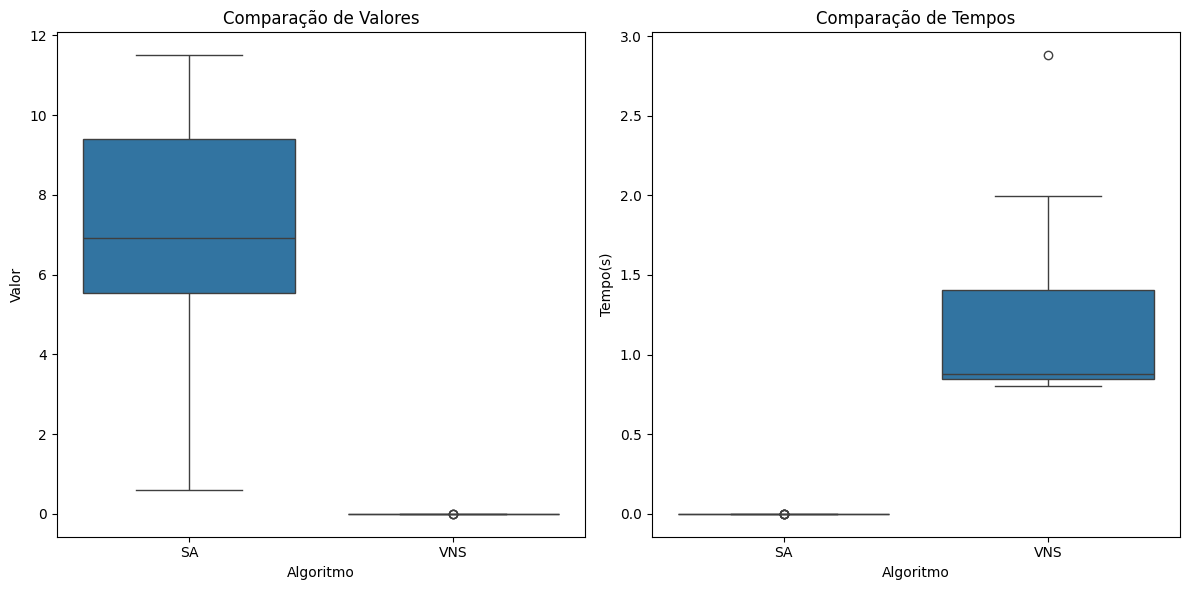


--------------------------------------------------
Executando B) Função 1; (-20, 20)...
--------------------------------------------------

Executando SA...

Executando VNS...

Estatísticas para B) Função 1; (-20, 20):
Tempos SA: Total = 0.02s | Médio = 0.00s
Tempos VNS: Total = 20.99s | Médio = 0.70s

Desempenho dos Algoritmos:
              Valor                                Tempo(s)          
                min       max      mean       std      mean       std
Algoritmo                                                            
SA         0.100727  2.406594  1.464357  0.623787  0.000528  0.000063
VNS        0.000249  0.099873  0.005699  0.017878  0.699584  0.162842


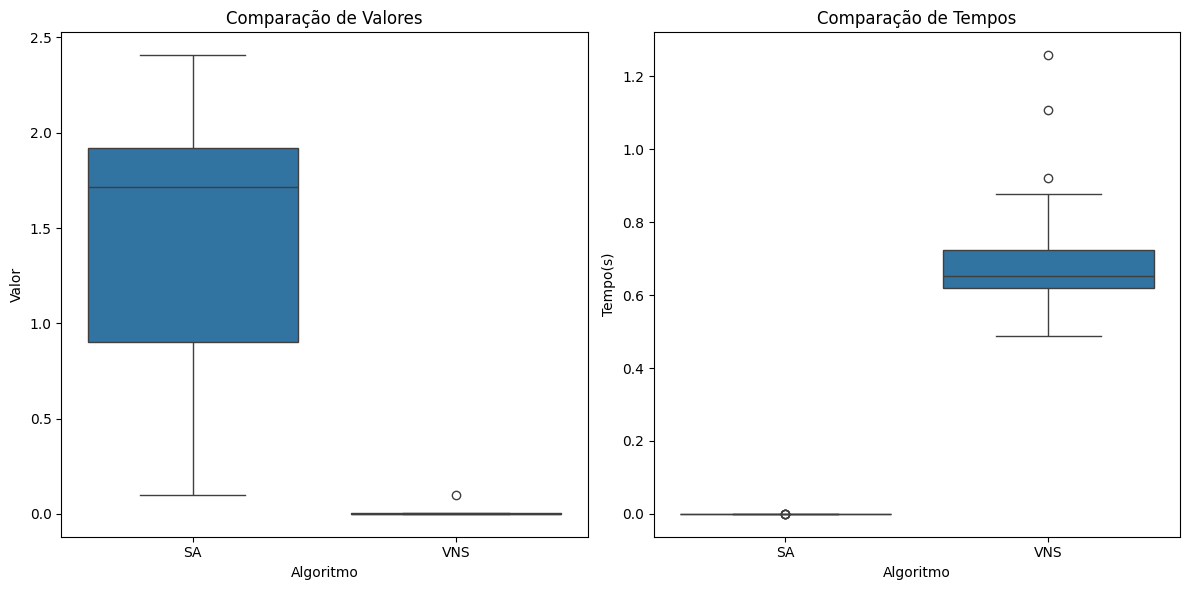


--------------------------------------------------
Executando C) Função 2; (-10, 10)...
--------------------------------------------------

Executando SA...

Executando VNS...

Estatísticas para C) Função 2; (-10, 10):
Tempos SA: Total = 0.04s | Médio = 0.00s
Tempos VNS: Total = 37.60s | Médio = 1.25s

Desempenho dos Algoritmos:
              Valor                                             Tempo(s)  \
                min            max          mean           std      mean   
Algoritmo                                                                  
SA         2.795442  303453.891519  18699.979213  54421.627482  0.001250   
VNS        0.079159       0.606393      0.255132      0.141295  1.253406   

                     
                std  
Algoritmo            
SA         0.000392  
VNS        0.322967  


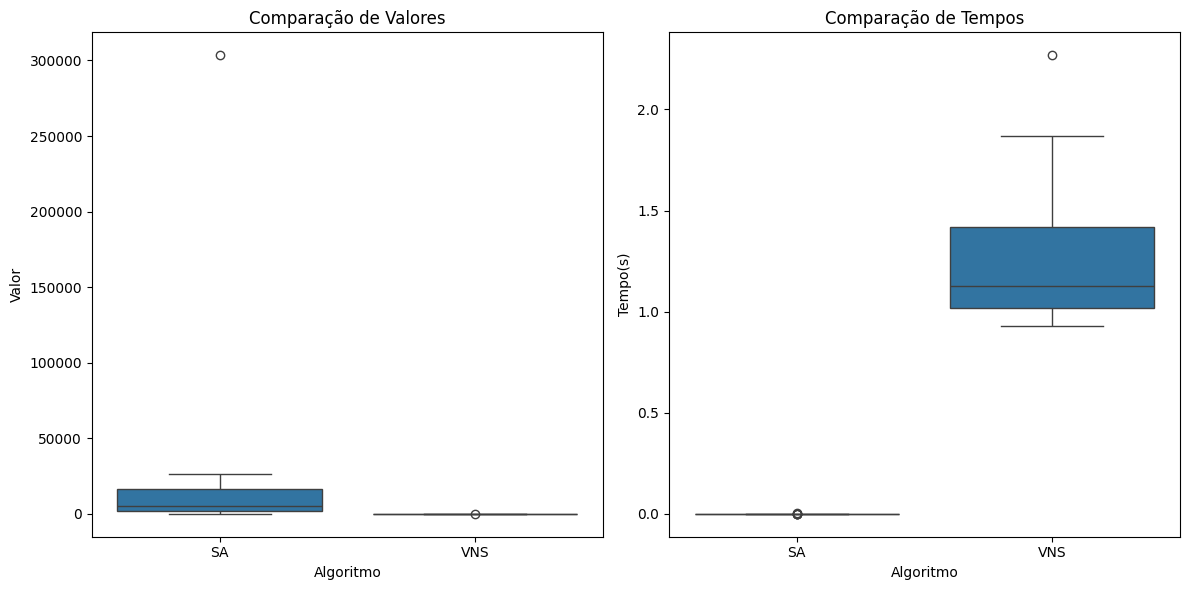


--------------------------------------------------
Executando D) Função 2; (-2, 2)...
--------------------------------------------------

Executando SA...

Executando VNS...

Estatísticas para D) Função 2; (-2, 2):
Tempos SA: Total = 0.05s | Médio = 0.00s
Tempos VNS: Total = 18.95s | Médio = 0.63s

Desempenho dos Algoritmos:
              Valor                                      Tempo(s)          
                min         max        mean         std      mean       std
Algoritmo                                                                  
SA         2.420213  694.134349  147.624011  198.620393  0.001667  0.000443
VNS        0.004367    0.078017    0.030416    0.016265  0.631700  0.203744


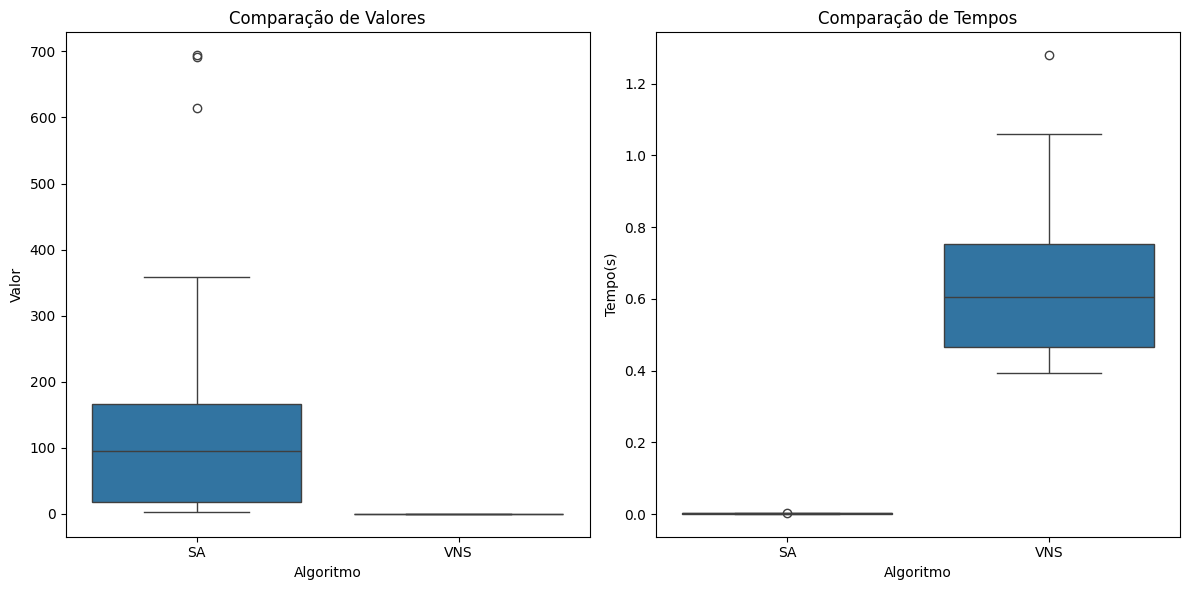


Melhor solução para A) Função 1; (-100, 100):
SA: Valor = 0.6009
Variáveis: [np.float64(5.9548), np.float64(0.6522)]
VNS: Valor = 0.0001
Variáveis: [np.float64(0.0005), np.float64(-0.0007)]

Melhor solução para B) Função 1; (-20, 20):
SA: Valor = 0.1007
Variáveis: [np.float64(0.661), np.float64(-0.7558)]
VNS: Valor = 0.0002
Variáveis: [np.float64(0.001), np.float64(-0.0015)]

Melhor solução para C) Função 2; (-10, 10):
SA: Valor = 2.7954
Variáveis: [np.float64(0.5768), np.float64(0.3249), np.float64(1.2588), np.float64(1.4406)]
VNS: Valor = 0.0792
Variáveis: [np.float64(0.9183), np.float64(0.8314), np.float64(1.0902), np.float64(1.1679)]

Melhor solução para D) Função 2; (-2, 2):
SA: Valor = 2.4202
Variáveis: [np.float64(1.3278), np.float64(1.7585), np.float64(-0.2289), np.float64(0.117)]
VNS: Valor = 0.0044
Variáveis: [np.float64(1.0129), np.float64(1.029), np.float64(0.9781), np.float64(0.9604)]


In [ ]:
problemas = [
    {
        'nome': 'A) Função 1; (-100, 100)',
        'funcao': f1,
        'intervalo': (-100, 100),
        'dimension': 2,
        'sa_params': {'passo': 2.0, 'temp_inicial': 50, 'max_iter': 30},  # Adicionado
        'vns_params': {'k_max': 5, 'step_size': 2.0, 'max_iter': 30}
    },
    {
        'nome': 'B) Função 1; (-20, 20)',
        'funcao': f1,
        'intervalo': (-20, 20),
        'dimension': 2,
        'sa_params': {'passo': 0.5, 'temp_inicial': 20, 'max_iter': 30},  # Adicionado
        'vns_params': {'k_max': 3, 'step_size': 1.0, 'max_iter': 30}
    },
    {
        'nome': 'C) Função 2; (-10, 10)',
        'funcao': f2,
        'intervalo': (-10, 10),
        'dimension': 4,
        'sa_params': {'passo': 1.0, 'temp_inicial': 100, 'max_iter': 30},  # Adicionado
        'vns_params': {'k_max': 5, 'step_size': 1.5, 'max_iter': 30}
    },
    {
        'nome': 'D) Função 2; (-2, 2)',
        'funcao': f2,
        'intervalo': (-2, 2),
        'dimension': 4,
        'sa_params': {'passo': 0.2, 'temp_inicial': 50, 'max_iter': 30},  # Adicionado
        'vns_params': {'k_max': 2, 'step_size': 0.5, 'max_iter': 30}
    }
]

# Executar análise
resultados = executar_experimentos(problemas)

# Exibir melhores soluções
for res in resultados:
    print(f"\nMelhor solução para {res['nome']}:")
    print(f"SA: Valor = {res['melhores']['SA'][0]:.4f}")
    print(f"Variáveis: {[round(x,4) for x in res['melhores']['SA'][1]]}")
    print(f"VNS: Valor = {res['melhores']['VNS'][0]:.4f}")
    print(f"Variáveis: {[round(x,4) for x in res['melhores']['VNS'][1]]}")

Pode-se observar que o S.A foi mais rápido, porém obteve, para o limite de iterações fixo, um valor muito grande com relação ao V.N.S, provavelmente, mais próximo do valor ótimo (mínimo) de ambas funções objetivo. O intervalo interfere no tempo de processamento do código, porém, como é pequeno, quaisquer sejam os tempos, não há necessariamente um problema em questão da execução do código. Porém o intervalo menor interfere no resultado final como podemos observar acima.